In [63]:
# Modules
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import os
import re
import string
import statsmodels.api as sm

In [28]:
# Read final data csv into df
final_df = pd.read_csv('../Final/raw_data/final merged data.csv')

final_df

,Unnamed: 0,Median Age,Median Household Income,Population,Locale,Violent Crime Total,Property Crime Total,Violent Rate,Property Rate,Walk Score,Population Density
0,0,38.5,101883.0,67958.0,"Albemarle County, Virginia",97,1604,0.001427,0.023603,5.32,144.962534
1,1,35.8,146422.0,87319.0,"Alexandria city, Virginia",280,2983,0.003207,0.034162,52.59,10005.381352
2,2,33.8,220173.0,105120.0,"Arlington County, Virginia",314,3521,0.002987,0.033495,62.63,8730.032197
3,3,36.6,228168.0,70176.0,"Chesapeake city, Virginia",999,6429,0.014236,0.091613,3.63,684.803983
4,4,38.0,324337.0,72514.0,"Chesterfield County, Virginia",422,6373,0.005820,0.087886,7.99,785.356713
5,5,37.4,1117072.0,112102.0,"Fairfax County, Virginia",969,14603,0.008644,0.130265,54.82,2910.082967
6,6,35.5,136904.0,49879.0,"Hampton city, Virginia",349,4441,0.006997,0.089035,30.15,2660.875061
7,7,37.8,314878.0,61438.0,"Henrico County, Virginia",502,7818,0.008171,0.127250,16.43,1377.525769
8,8,35.1,338916.0,123966.0,"Loudoun County, Virginia",221,2607,0.001783,0.021030,3.38,703.918424
9,9,32.7,181362.0,51000.0,"Newport News city, Virginia",782,5552,0.015333,0.108863,27.54,2657.263510


In [29]:
scipy.stats.linregress(final_df['Walk Score'], final_df['Population Density'].astype(float))

LinregressResult(slope=121.78521780347289, intercept=-179.22681497391704, rvalue=0.85277245038292748, pvalue=2.6993943658670418e-05, stderr=19.934391435047633)

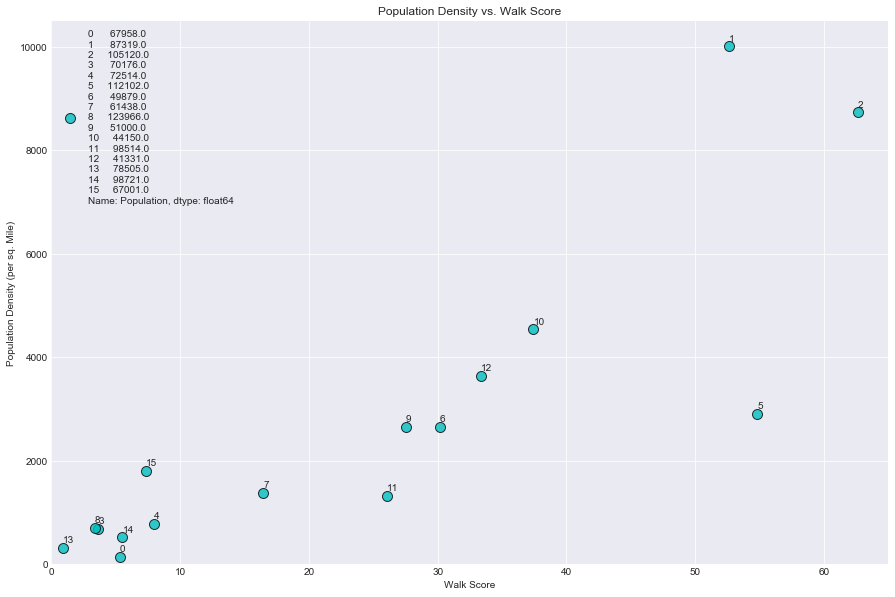

In [64]:
# Build scatter plot population density vs. walk score
fig, ax = plt.subplots(figsize=(15, 10))


final_df['Population Density'] = round(final_df['Population Density'].astype(float), 2)

#for i in range(len(final_df['Locale'])):
ax.scatter(final_df['Walk Score'], final_df['Population Density'],
           edgecolor="k", linewidths=1, marker="o", s=100, label=final_df.iloc[:,3],
           alpha=0.8, c='c')

for i,text in enumerate(final_df['Locale']):
    ax.annotate(i, (final_df['Walk Score'][i]+0.01, final_df['Population Density'][i]+100))


# format graph 
sns.set_style('darkgrid')
plt.xlim([0, 65])
plt.ylim([0, 10500])

plt.xlabel('Walk Score')
plt.ylabel('Population Density (per sq. Mile)')
plt.title('Population Density vs. Walk Score')

plt.legend(loc=2)

# save figure
plt.savefig('output/popdens_v_walkscore.png')

# show plot
plt.show()

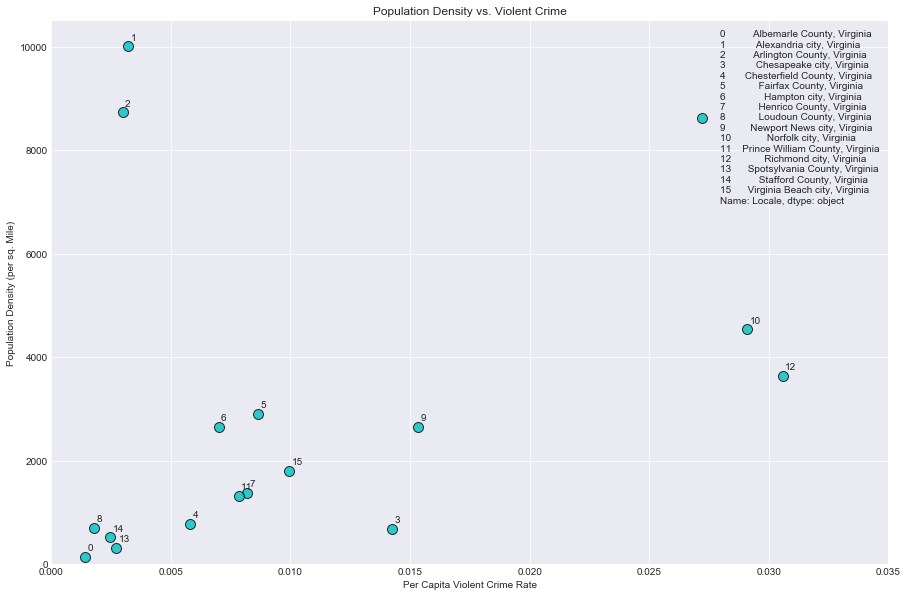

In [43]:
# Build scatter plot population density vs. Violent Crime Rate
fig, ax = plt.subplots(figsize=(15, 10))


final_df['Population Density'] = round(final_df['Population Density'].astype(float), 2)

ax.scatter(final_df['Violent Rate'], final_df['Population Density'],
           edgecolor="k", linewidths=1, marker="o", s=100, label=final_df['Locale'],
           c='c', alpha=0.8)

for i,text in enumerate(final_df['Locale']):
    ax.annotate(i, (final_df['Violent Rate'][i]+0.0001, final_df['Population Density'][i]+120))

# format graph 
sns.set_style('darkgrid')
plt.xlim([0, 0.035])
plt.ylim([0, 10500])

plt.xlabel('Per Capita Violent Crime Rate')
plt.ylabel('Population Density (per sq. Mile)')
plt.title('Population Density vs. Violent Crime')
plt.legend(loc='best')

# save figure
#plt.savefig('output/popdens_v_vcrime.png')

# show plot
plt.show()

In [44]:
scipy.stats.linregress(final_df['Violent Rate'], final_df['Population Density'].astype(float))

LinregressResult(slope=32089.882422386494, intercept=2372.4890877731423, rvalue=0.099123719872693861, pvalue=0.71493706184142525, stderr=86095.882615855458)

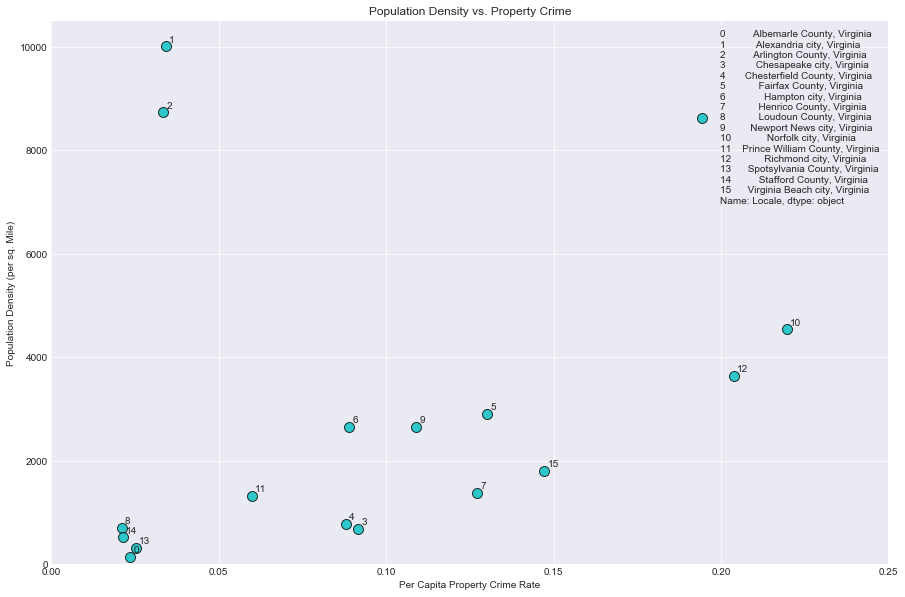

In [65]:
# Build scatter plot population density vs. Property Crime Rate
fig, ax = plt.subplots(figsize=(15, 10))

final_df['Population Density'] = round(final_df['Population Density'].astype(float), 2)

ax.scatter(final_df['Property Rate'], final_df['Population Density'],
           edgecolor="k", linewidths=1, marker="o", s=100, label=final_df['Locale'],
           c='c', alpha=0.8)

for i,text in enumerate(final_df['Locale']):
    ax.annotate(i, (final_df['Property Rate'][i]+0.001, final_df['Population Density'][i]+80))

# format graph 
sns.set_style('darkgrid')
plt.xlim([0, 0.25])
plt.ylim([0, 10500])

plt.xlabel('Per Capita Property Crime Rate')
plt.ylabel('Population Density (per sq. Mile)')
plt.title('Population Density vs. Property Crime')
plt.legend(loc='best')

# save figure
plt.savefig('output/popdens_v_pcrime.png')

# show plot
plt.show()

In [46]:
scipy.stats.linregress(final_df['Property Rate'], final_df['Population Density'].astype(float))

LinregressResult(slope=2542.8805274141077, intercept=2449.501131256211, rvalue=0.056021116193063547, pvalue=0.83673786650732129, stderr=12112.327962146515)

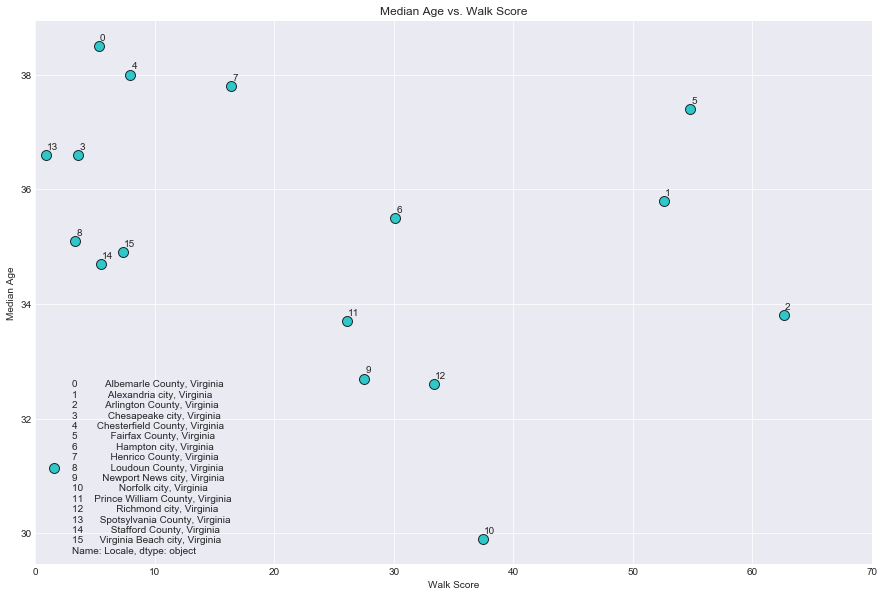

In [66]:
# Build scatter plot for median age vs. walk score
fig, ax = plt.subplots(figsize=(15, 10))


ax.scatter(final_df['Walk Score'], final_df['Median Age'], color='c', edgecolor='black',
           linewidths=1, marker="o", s=100, label=final_df['Locale'], alpha=.8)


for i,text in enumerate(final_df['Locale']):
    ax.annotate(i, (final_df['Walk Score'][i]+0.1, final_df['Median Age'][i]+.1))


# Format graph
plt.xlabel('Walk Score')
plt.ylabel('Median Age')
plt.title('Median Age vs. Walk Score')
plt.xlim(0,70)
sns.set_style('darkgrid')
plt.legend(loc='best')
plt.savefig('output/Median Age vs. Walk Score.png')


plt.show()

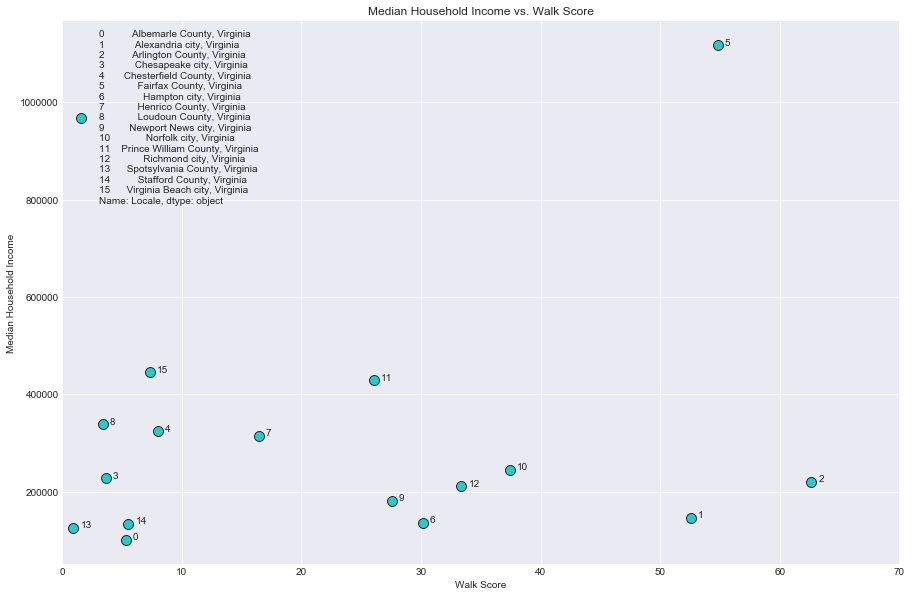

In [67]:
# Build scatter plot for median age vs. walk score
fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(final_df['Walk Score'], final_df['Median Household Income'], color='c',
            edgecolor='black', alpha=.8, linewidths=1, marker="o", s=100, label=final_df['Locale'])

for i,text in enumerate(final_df['Locale']):
    ax.annotate(i, (final_df['Walk Score'][i]+.6, final_df['Median Household Income'][i]+100))

# Format graph
plt.xlabel('Walk Score')
plt.ylabel('Median Household Income')
plt.title('Median Household Income vs. Walk Score')
plt.xlim(0,70)
sns.set_style('darkgrid')
plt.legend(loc='best')

plt.savefig('output/Median Household Income vs. Walk Score.png')


plt.show()


In [68]:
# Add data to plot for violent crime totals.
violent = plt.scatter(final_df['Walk Score'],
                      final_df['Violent Rate'],
                      label='Violent', color='hotpink', alpha=.8, edgecolor='black')                    

# Add data to plot for property crime totals.
property = plt.scatter(final_df['Walk Score'],
                       final_df['Property Rate'],
                       label='Property', color='c', alpha=.8, edgecolor='black')

# Add a legend in the best location.
plt.legend(handles=[violent, property], loc='best', title='Crime Type', frameon=True)

# Add labels to the x- and y-axes; give the chart a title.
plt.xlabel('Walk Score')
plt.ylabel('Per Capita Crime Rate')
plt.title('Crime Rate vs. Walk Score')

# Set x and y limits.
plt.xlim(0, 70)
plt.ylim(-.01, .3)

# Set the grid background style.
sns.set_style('darkgrid')

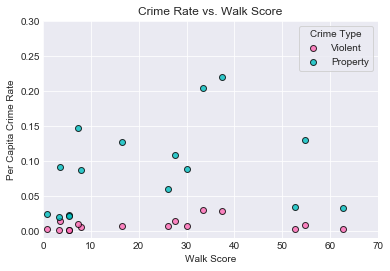

In [69]:
# Save and display plot.
output_path = os.path.join('output', 'crime-rate-vs-walk-score.png')
plt.savefig(output_path, dpi=200)
plt.show()

**Observed Trend**: No relationship between walk score and rate of violent crime, nor rate of property crime. Highest crime rates in both categories occurred for the two locales with walk scores in the mid- to upper-thirties.

## Correlations

In [41]:
# Violent Crime Rate vs. Walk Score
violent_corr = np.corrcoef(final_df['Walk Score'], final_df['Violent Rate'])

# Property Crime Rate vs. Walk Score
property_corr = np.corrcoef(final_df['Walk Score'], final_df['Property Rate'])

# Print results
print('Violent crime rates and property crime rates do not correlate with\
walk scores (r = '+str(violent_corr[0,1])+' and r = '+str(property_corr[0,1])+', \
respectively')

Violent crime rates and property crime rates do not correlate withwalk scores (r = 0.205869188145 and r = 0.2270467226, respectively


**Conclusion:** Violent crime rates and property crime rates do not correlate with walk scores.

In [50]:
# Read and df bulk walkscore.com data for method analysis
df = pd.read_csv('raw_data/walk and transit scores.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head(5)

,Area,lat,lon,walk score,transit score
0,"Albemarle County, Virginia",37.971597,-78.678889,0.0,NaN
1,"Albemarle County, Virginia",38.016123,-78.585680,0.0,NaN
2,"Albemarle County, Virginia",37.915674,-78.559752,0.0,NaN
3,"Albemarle County, Virginia",37.929954,-78.628748,0.0,NaN
4,"Albemarle County, Virginia",38.083671,-78.626375,0.0,NaN


In [51]:
# Begin minor clean of dataframe to prepare for visualization
df.head()
df['Area'].unique()

array(['Albemarle County, Virginia ', 'Alexandria city, Virginia',
       'Arlington County, Virginia', 'Chesapeake city, Virginia',
       'Chesterfield County, Virginia', 'Fairfax County, Virginia',
       'Hampton city, Virginia', 'Henrico County, Virginia',
       'Loudoun County, Virginia', 'Newport News city, Virginia',
       'Norfolk city, Virginia', 'Prince William County, Virginia',
       'Richmond city, Virginia', 'Spotsylvania County, Virginia',
       'Stafford County, Virginia', 'Virginia Beach city, Virginia'], dtype=object)

In [52]:
# Complete minor clean of dataframe to prepare for visualization
df['area_fixed'] = df.Area.str.replace(' Police Department' , '')
df['area_fixed'] = df.area_fixed.str.replace(' Sheriff Office' , '')
df['area_fixed'] = df.area_fixed.str.replace(' Police Dept' , '')
df['area_fixed'] = df.area_fixed.str.replace(' Bureau Of Police' , '')
df['area_fixed'] = df.area_fixed.str.replace(' Police Department' , '')
display(df.head())
display(df['area_fixed'].unique())
df.drop('Area',axis=1)

,Area,lat,lon,walk score,transit score,area_fixed
0,"Albemarle County, Virginia",37.971597,-78.678889,0.0,NaN,"Albemarle County, Virginia"
1,"Albemarle County, Virginia",38.016123,-78.585680,0.0,NaN,"Albemarle County, Virginia"
2,"Albemarle County, Virginia",37.915674,-78.559752,0.0,NaN,"Albemarle County, Virginia"
3,"Albemarle County, Virginia",37.929954,-78.628748,0.0,NaN,"Albemarle County, Virginia"
4,"Albemarle County, Virginia",38.083671,-78.626375,0.0,NaN,"Albemarle County, Virginia"


array(['Albemarle County, Virginia ', 'Alexandria city, Virginia',
       'Arlington County, Virginia', 'Chesapeake city, Virginia',
       'Chesterfield County, Virginia', 'Fairfax County, Virginia',
       'Hampton city, Virginia', 'Henrico County, Virginia',
       'Loudoun County, Virginia', 'Newport News city, Virginia',
       'Norfolk city, Virginia', 'Prince William County, Virginia',
       'Richmond city, Virginia', 'Spotsylvania County, Virginia',
       'Stafford County, Virginia', 'Virginia Beach city, Virginia'], dtype=object)

,lat,lon,walk score,transit score,area_fixed
0,37.971597,-78.678889,0.0,NaN,"Albemarle County, Virginia"
1,38.016123,-78.585680,0.0,NaN,"Albemarle County, Virginia"
2,37.915674,-78.559752,0.0,NaN,"Albemarle County, Virginia"
3,37.929954,-78.628748,0.0,NaN,"Albemarle County, Virginia"
4,38.083671,-78.626375,0.0,NaN,"Albemarle County, Virginia"
5,38.035243,-78.454920,51.0,NaN,"Albemarle County, Virginia"
6,38.094007,-78.681978,3.0,NaN,"Albemarle County, Virginia"
7,38.024995,-78.673217,0.0,NaN,"Albemarle County, Virginia"
8,38.022927,-78.677170,0.0,NaN,"Albemarle County, Virginia"
9,37.973150,-78.478986,0.0,NaN,"Albemarle County, Virginia"


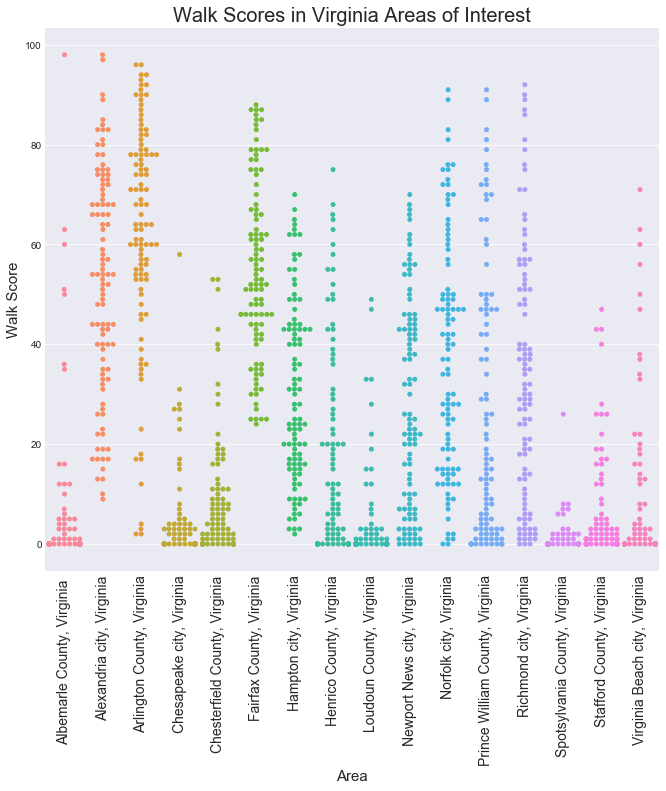

In [70]:
# Build visual for bulk walkscore.com data to assist in explaining methodology

sns.set_style("darkgrid")
plt.subplots(figsize=(11,10))
ax = sns.swarmplot(x="area_fixed", y="walk score", data=df)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=14)
plt.title('Walk Scores in Virginia Areas of Interest', size = 20)
plt.xlabel('Area',size = 15)
plt.ylabel('Walk Score',size = 15)
plt.savefig('output/Walk Scores in Virginia.png')
plt.show()

In [60]:
agewalkmodel = sm.OLS(final_df['Walk Score'], final_df['Median Age']).fit()
predictions = agewalkmodel.predict(final_df['Median Age']) # make the predictions by the model

# Print out the statistics
agewalkmodel.summary()

C:\Users\brbal\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Walk Score   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     19.20
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           0.000536
Time:                        16:55:28   Log-Likelihood:                -70.869
No. Observations:                  16   AIC:                             143.7
Df Residuals:                      15   BIC:                             144.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Median Age     0.6506      0.148      4.382      0.001       0.334       0.967
==============================================================================
Omnibus:                        2.218   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.467
Skew:                           0.519   Prob(JB):                        0.480
Kurtosis:                       1.941   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
incomewalkmodel = sm.OLS(final_df['Walk Score'], final_df['Median Household Income']).fit()
predictions = incomewalkmodel.predict(final_df['Median Household Income']) # make the predictions by the model

# Print out the statistics
incomewalkmodel.summary()

C:\Users\brbal\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Walk Score   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     16.45
Date:                Thu, 04 Jan 2018   Prob (F-statistic):            0.00103
Time:                        16:56:01   Log-Likelihood:                -71.539
No. Observations:                  16   AIC:                             145.1
Df Residuals:                      15   BIC:                             145.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Median Household Income  5.882e-05   1.45e-05      4.056      0.001    2.79e-05    8.97e-05
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.807
Skew:                           0.787   Prob(JB):                        0.405
Kurtosis:                       2.520   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
popwalkmodel = sm.OLS(final_df['Walk Score'], final_df['Population']).fit()
predictions = popwalkmodel.predict(final_df['Population']) # make the predictions by the model

# Print out the statistics
popwalkmodel.summary()

C:\Users\brbal\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Walk Score   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     19.01
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           0.000560
Time:                        16:56:41   Log-Likelihood:                -70.914
No. Observations:                  16   AIC:                             143.8
Df Residuals:                      15   BIC:                             144.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0003   6.52e-05      4.360      0.001       0.000       0.000
==============================================================================
Omnibus:                        4.615   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.378
Skew:                           0.034   Prob(JB):                        0.502
Kurtosis:                       1.564   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""